In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree.export import export_text
import pickle

In [0]:
selected_features = ['ONLINE_STORE_CATEGORY', 'SIZE_CDE', 'CLOR_CDE', 'SELLING_PRICE', 'PRODUCT_CLASS_02', 'FMALE_IND', 'MRYD_IND', 'BRAND_CODE', 'EDUC_LVL_NBR', 'MRYD', 'AGE', '2017_M7_PURCHASE_AMT', '2017_M7_RETURNED_AMT','PRODUCT_CLASS_01', 'PRODUCT_CLASS_02']

In [0]:
chunks = pd.read_csv('dataset/DataSet01.csv', chunksize=1000000)
df = []
for chunk in chunks:
    df = chunk
    break # Selected only first chunk. Todo: remove the break and perform model training for all the chunks.

In [0]:
#split dataset in features and target variable
X = df[selected_features]
y = df.RETURN_INDICATION

In [0]:
# Display the first 5 data items of the X (attributes)
X.head()

,ONLINE_STORE_CATEGORY,SIZE_CDE,CLOR_CDE,SELLING_PRICE,PRODUCT_CLASS_02,FMALE_IND,MRYD_IND,BRAND_CODE,EDUC_LVL_NBR,MRYD,AGE,2017_M7_PURCHASE_AMT,2017_M7_RETURNED_AMT,PRODUCT_CLASS_01,PRODUCT_CLASS_02
0,384109217,30110,231,4.97,1839971306,1,0,118854768,4,0,64,85.47,53.58,1294439185,1839971306
1,384109217,30110,231,4.97,1839971306,1,0,118854768,4,0,64,85.47,53.58,1294439185,1839971306
2,384109217,30110,231,4.97,1839971306,1,0,118854768,4,0,64,85.47,53.58,1294439185,1839971306
3,384109217,10975,021,11.65,572054888,1,1,1663051157,3,1,40,27.08,0.00,1857754470,572054888
4,73168914,33966,401,9.59,1553426509,1,1,1537347873,3,1,40,27.08,0.00,1631220,1553426509


In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [0]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [0]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [0]:
# save the created decision tree model for later use
pickle.dump(model, open('finalized_model.sav', 'wb'))

[Text(217.62000000000003, 201.90857142857143, 'X[0] <= 1844718848.0\ngini = 0.137\nsamples = 22108091\nvalue = [20468332, 1639759]'),
 Text(133.92000000000002, 170.84571428571428, 'X[3] <= 13.595\ngini = 0.155\nsamples = 19252284\nvalue = [17616536, 1635748]'),
 Text(66.96000000000001, 139.78285714285715, 'X[12] <= 21.245\ngini = 0.1\nsamples = 9024818\nvalue = [8545950, 478868]'),
 Text(33.480000000000004, 108.72, 'X[3] <= 8.005\ngini = 0.089\nsamples = 8249108\nvalue = [7865342, 383766]'),
 Text(16.740000000000002, 77.65714285714284, 'X[3] <= 5.235\ngini = 0.07\nsamples = 4772489\nvalue = [4599977, 172512]'),
 Text(8.370000000000001, 46.59428571428572, 'X[0] <= 384941840.0\ngini = 0.056\nsamples = 2395801\nvalue = [2326176, 69625]'),
 Text(4.1850000000000005, 15.531428571428563, '\n  (...)  \n'),
 Text(12.555000000000001, 15.531428571428563, '\n  (...)  \n'),
 Text(25.110000000000003, 46.59428571428572, 'X[0] <= 384941840.0\ngini = 0.083\nsamples = 2376688\nvalue = [2273801, 102887]'

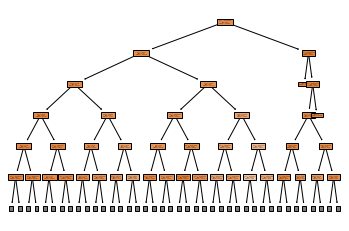

In [0]:
# Plot the tree. Note that only 5 depths are plotted.
model = DecisionTreeClassifier().fit(iris.data, iris.target)
tree.plot_tree(loaded_model, max_depth=5, filled=True)  

In [0]:
# Decision tree structure(with contents) display with text. Note thet whole tree is printed.
r = export_text(loaded_model)
print(r)

|--- feature_0 <= 1844718848.00
|   |--- feature_3 <= 13.60
|   |   |--- feature_12 <= 21.24
|   |   |   |--- feature_3 <= 8.01
|   |   |   |   |--- feature_3 <= 5.23
|   |   |   |   |   |--- feature_0 <= 384941840.00
|   |   |   |   |   |   |--- feature_0 <= 383568096.00
|   |   |   |   |   |   |   |--- feature_0 <= 77383952.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 72194224.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  72194224.00
|   |   |   |   |   |   |   |   |   |--- feature_12 <= 0.16
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 36
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 45
|   |   |   |   |   |   |   |   |   |--- feature_12 >  0.16
|   |   |   |   |   |   |   |   |   |   |--- feature_11 <= 55.20
|   |   |   |   |   |   |   